<a href="https://colab.research.google.com/github/youngchul-sung/three-minutes-keras/blob/master/ex3_1a_dnn_mnist_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

TensorFlow 2.x selected.


In [0]:
def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)


def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()


def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()

11493376/11490434 [==============================] - 0s 0us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.3768 - accuracy: 0.8949 - val_loss: 0.1872 - val_accuracy: 0.9477
Epoch 2/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.1600 - accuracy: 0.9516 - val_loss: 0.1468 - val_accuracy: 0.9578
Epoch 3/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.1157 - accuracy: 0.9654 - val_loss: 0.1133 - val_accuracy: 0.9685
Epoch 4/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0868 - accuracy: 0.9742 - val_loss: 0.1027 - val_accuracy: 0.9703
Epoch 5/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0679 - accuracy: 0.9791 - val_loss: 0.1006 - val_accuracy: 0.9704
Epoch 6/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.1000 - val_accuracy

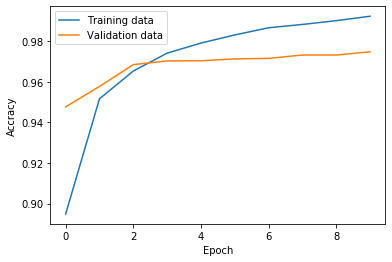

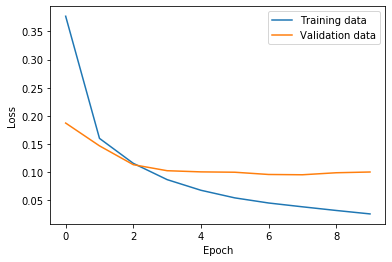

In [3]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', 
                 input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', 
                 name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])
        

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = keras.utils.to_categorical(y_train)
    Y_test = keras.utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


# 분류 DNN 학습 및 테스팅 ####################
def main():
    Nin = 784
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(Nin, Nh_l, Nout)
    history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)
    
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

# Run code
if __name__ == '__main__':
    main()